## <font color='5499C7'> Importing libraries</font> 


In [10]:

from pathlib import Path
import pandas as pd
import os
import numpy as np 
import math
from PIL import Image
import urllib.request
from multiprocessing.pool import ThreadPool


pd.set_option('display.max_columns', None)



## <font color='5499C7'> Now for we can start from here using CLIP</font> 


##### Setup Environment

In [11]:
#install CLIP and then make sure that we have torch 1.7.1 with CUDA support.

!pip install git+https://github.com/openai/CLIP.git
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-x2nnsqaa
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-x2nnsqaa
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [12]:
# load CLIP 
import clip
import torch

# Load the open CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)



# <font color='5499C7'> Search </font> 



## <font color='5499C7'> Function </font> 


In [13]:
# Read the photos table
#photos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone /data/unsplash/photos.tsv000', sep='\t', header=0)
photo_path ='/content/drive/MyDrive/Colab Notebooks/project2/data/deepFashion/photos/'
# Load the features and the corresponding IDs
photo_features = np.load('/content/drive/MyDrive/Colab Notebooks/project2/data/deepFashion/features/features.npy')
photo_ids = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project2/data/deepFashion/features/photo_ids.csv')
photo_ids = list(photo_ids['photo_id'])

In [14]:
def encode_search_query(search_query):
  with torch.no_grad():
    # Encode and normalize the description using CLIP
    text_encoded = model.encode_text(clip.tokenize(search_query).to(device))
    text_encoded /= text_encoded.norm(dim=-1, keepdim=True)

  # Retrieve the feature vector
  return text_encoded

In [15]:
def find_best_matches(text_features, photo_features, photo_ids, results_count=3):
  # Compute the similarity between the descrption and each photo using the Cosine similarity
  similarities = list((text_features @ photo_features.T).squeeze(0))
 
  # Sort the photos by their similarity score
  best_photos = sorted(zip(similarities, range(photo_features.shape[0])), key=lambda x: x[0], reverse=True)

  # Return the photo IDs of the best matches
  photo_idd =[]
  for i in range(results_count):
    # Retrieve the photo ID
    idx = best_photos[i][1]
    photo_idd.append(photo_ids[idx])
 
  return photo_idd

In [16]:
from IPython.display import Image
def display_photo(photo_id):
  display(Image(photo_path+photo_id+".jpg"))
  print()

In [17]:
def search_unslash(search_query, photo_features, photo_ids, results_count=3):
  # Encode the search query
  text_features = encode_search_query(search_query)

  # Find the best matches
  best_photo_ids = find_best_matches(text_features, photo_features, photo_ids, results_count)

  # Display the best photos
  for photo_id in best_photo_ids:
    display_photo(photo_id)

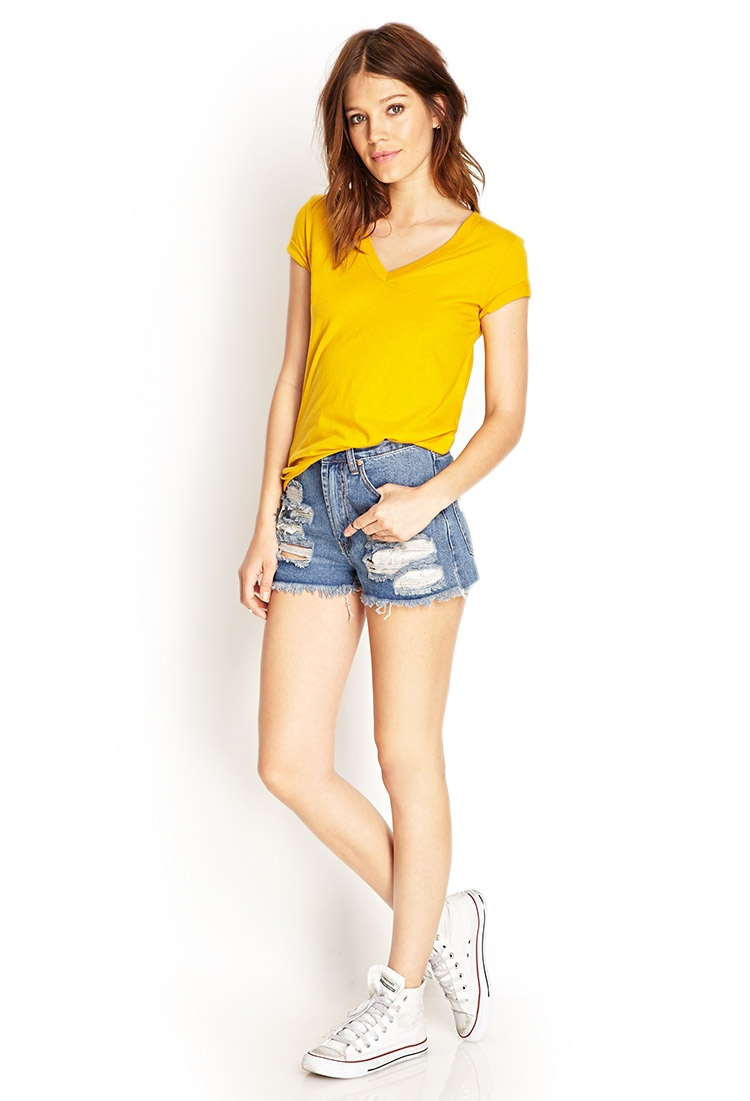

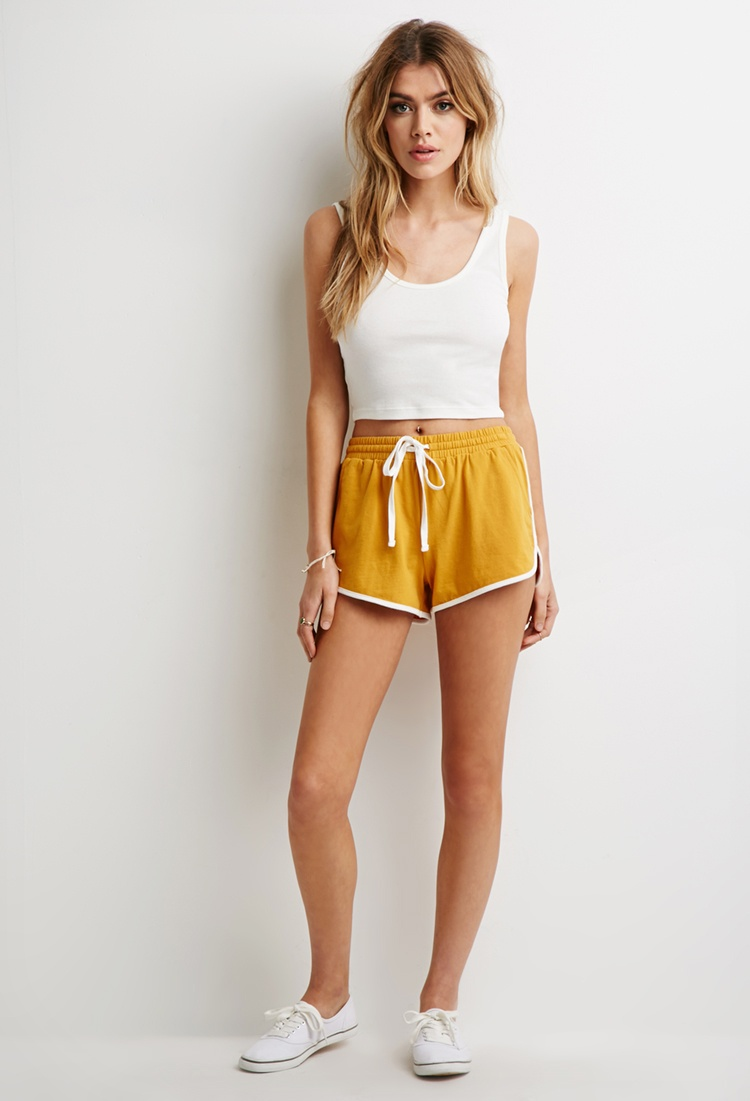

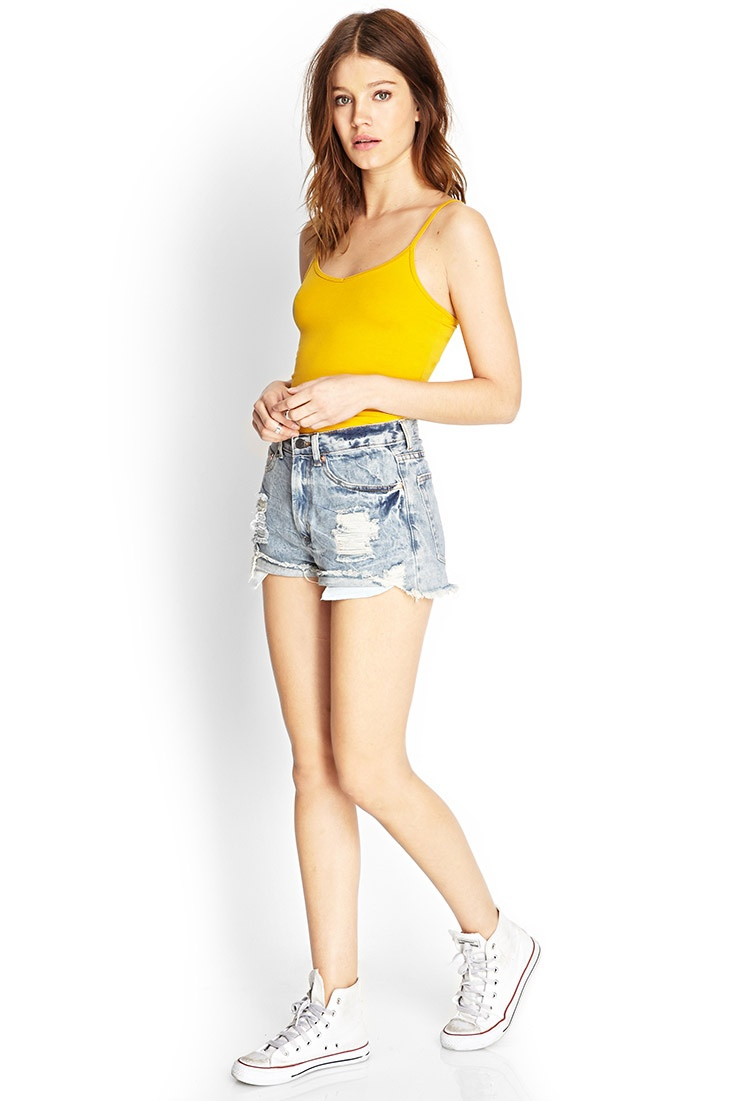

In [18]:
search_query = "yellow shorts"

search_unslash(search_query, photo_features, photo_ids, 3)

## <font color='5499C7'> deployment </font> 


Step 1: Create a New Notebook and write your app.py
use %%writefile app.py to save  the app on the sandbox and 
!pip install streamlit to install streamlit

Step 2: Get an Authentication Token from ngrok
visit ngrok.com to get your authtoken 

Step 3: Download and save ngrok in sandbox
!wget https://bin.equinox.io/c/4VmDzA7iaHb/...

Step 4: Unzip ngrok
!unzip ngrok-stable-linux-amd64.zip

Step 5: Create a Local Tunnel for ngrok to host app.py
get_ipython().system_raw('./ngrok http 8501 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Step 6: Run Streamlit app.py
!streamlit run /content/app.py

In [8]:
! pip install -U ipykernel 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
! pip install -q streamlit

In [10]:
! pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
%%writefile app.py

"""
Created on Wed march 1 

@author: nohaMohammad
"""
# Import the libraries.
import streamlit as st
import pandas as pd
import numpy as np
from PIL import Image
# load CLIP 
import clip
import torch

# Load the open CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
############################################################
# Specify title and logo for the webpage.
st.set_page_config(page_title='Styla', 
page_icon='👗', layout="wide")
##############################################################3
#Loading the data
photo_path ='/content/drive/MyDrive/Colab Notebooks/project2/data/deepFashion/photos/'

# Load the features and the corresponding IDs
photo_features = np.load('/content/drive/MyDrive/Colab Notebooks/project2/data/deepFashion/features/features.npy')
photo_ids = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project2/data/deepFashion/features/photo_ids.csv')
photo_ids = list(photo_ids['photo_id'])

######################################################

######################################################

def encode_search_query(search_query):
  with torch.no_grad():
    # Encode and normalize the description using CLIP
    text_encoded = model.encode_text(clip.tokenize(search_query).to(device))
    text_encoded /= text_encoded.norm(dim=-1, keepdim=True)

  # Retrieve the feature vector
  return text_encoded
#########################################################
#find top 3 images match the description 
def find_best_matches(text_features, photo_features, photo_ids, results_count=3):
  # Compute the similarity between the descrption and each photo using the Cosine similarity
  similarities = list((text_features @ photo_features.T).squeeze(0))
 
  # Sort the photos by their similarity score
  best_photos = sorted(zip(similarities, range(photo_features.shape[0])), key=lambda x: x[0], reverse=True)

  # Return the photo IDs of the best matches
  photo_idd =[]
  for i in range(results_count):
    # Retrieve the photo ID
    idx = best_photos[i][1]
    photo_idd.append(photo_ids[idx])
 
  return photo_idd
#########################################################
#display image 

def display_photo(num ,photo_id):
  #image = Image.open(photo_path+photo_id+".jpg")
  #new_image = image.resize((250, 500))
  #st.image(new_image)

  image = Image.open(photo_path+photo_id+".jpg")
  
  if num == 0:
    #col1.header('first Outfit')
    col1.caption('first Outfit')
    col1.image(image, use_column_width=True)
 
  elif num == 1:
    col2.caption('second Outfit')
    col2.image(image, use_column_width=True)
 
  elif num == 2:
    col3.caption('third Outfit')
    col3.image(image, use_column_width=True)
  
  print()


#########################################################
def search_unslash(search_query, photo_features, photo_ids, results_count=3):
  # Encode the search query
  text_features = encode_search_query(search_query)

  # Find the best matches
  best_photo_ids = find_best_matches(text_features, photo_features, photo_ids, results_count)

  # Display the best photos
  #for photo_id in best_photo_ids:
    #display_photo(photo_id)
  for index, photo_id in enumerate(best_photo_ids):
    print (index, photo_id)
    display_photo(index,photo_id)
#########################################################

st.markdown('<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">', unsafe_allow_html=True)

st.markdown("""
<nav class="navbar fixed-top navbar-expand-lg navbar-dark" style="background-color: #114338;">
  
  <div class="collapse navbar-collapse" id="navbarNav">
    <ul class="navbar-nav">
      <li class="nav-item active">
        <a class="nav-link disabled" href="#">Home <span class="sr-only">(current)</span></a>
      </li>
      
    </ul>
  </div>
</nav>
""", unsafe_allow_html=True)
#########################################################

# Add a sidebar to the web page. 
#st.markdown('---')
# Sidebar Configuration
st.sidebar.image('/content/drive/MyDrive/MicrosoftTeams-image (2).png', width=300)


st.sidebar.markdown('---')


st.title ("Hello , i'm Styla")
st.header("what outfit are you searching for ?")


Description = st.text_input ("", 'floral pink dress')
# code for prediction 
#Result = Description
#button for prediction 
if st.button("Search"):
  col1, col2, col3= st.columns(3)
  #opening the image
  Result= search_unslash(Description, photo_features, photo_ids, 3)




  

  
  











Overwriting app.py


In [33]:
!streamlit run app.py &>/dev/null&

In [34]:
# add your token here 

! ngrok authtoken

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [35]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip

--2023-03-26 03:12:14--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 18.205.222.128, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  14.1MB/s    in 0.9s    

2023-03-26 03:12:16 (14.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip


In [36]:
get_ipython().system_raw('./ngrok http 8501 &')


In [37]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://bf6c-34-83-150-38.ngrok.io


In [38]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8503
  External URL: http://34.83.150.38:8503

  Stopping...
  Stopping...
